# Time Series Correlation

Code from [Towards Data Science](https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9)

Other resources:
[Applied Time Series Analysis](https://nwfsc-timeseries.github.io/atsa-labs/sec-tslab-correlation-within-and-among-time-series.html)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import glob

home_dir = os.getenv("HOME")
home_dir

'/Users/mcmahonmc'

In [2]:
home_dir + "/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/*.csv"

'/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/*.csv'

In [25]:
act_files = glob.glob(home_dir + "/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/preproc/*7-d.csv")
len(act_files)

53

In [22]:
# resample actiwatch data to 1 minute bins

act = pd.read_csv(act_files[1], header=None, names = ['Time', 'Activity'])
act['Time'] = pd.to_datetime(act['Time'])
act = act.set_index(act['Time'])
act = act.resample('1T').sum()
act[0:5]

,Activity
Time,
2019-10-18 15:30:00,335.0
2019-10-18 15:31:00,478.0
2019-10-18 15:32:00,77.0
2019-10-18 15:33:00,109.0
2019-10-18 15:34:00,613.0


In [67]:
fitbit_files = glob.glob(home_dir + "/Box/CogNeuroLab/Wearables/data/fitbit/preproc/[1-2]*[0-9].csv", recursive=False)
len(fitbit_files)

52

In [70]:
fitbit_files

['/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/fitbit/preproc/10011.csv',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/fitbit/preproc/10012.csv',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/fitbit/preproc/10014.csv',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/fitbit/preproc/10016.csv',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/fitbit/preproc/10023.csv',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/fitbit/preproc/10024.csv',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/fitbit/preproc/10025.csv',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/fitbit/preproc/10033.csv',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/fitbit/preproc/10035.csv',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/fitbit/preproc/10038.csv',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/fitbit/preproc/10040.csv',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/fitbit/preproc/10045.csv',
 '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/fitbit/preproc/10049.csv',

In [69]:
fit = pd.read_csv(fitbit_files[1], header=None, names = ['Time', 'Activity'])
fit['Time'] = pd.to_datetime(fit['Time'])
fit = fit.set_index(fit['Time'])
fit = fit.resample('1T').sum()
len(fit)/60/24

6.670833333333333

In [31]:
df = []
df = pd.merge(act, fit, how='inner', left_index=True, right_index=True, suffixes = ('_Act', '_Fit'))
df = df[['Activity_Act', 'Activity_Fit']]
df[0:5]

,Activity_Act,Activity_Fit
Time,,
2019-10-18 15:30:00,335.0,105
2019-10-18 15:31:00,478.0,90
2019-10-18 15:32:00,77.0,13
2019-10-18 15:33:00,109.0,0
2019-10-18 15:34:00,613.0,80


### Check missing values

In [32]:
print('Subject missing %s values from Actiwatch' % df['Activity_Act'].isnull().sum())
print('Subject missing %s values from Fitbit' % df['Activity_Fit'].isnull().sum())

Subject missing 0 values from Actiwatch
Subject missing 0 values from Fitbit


In [33]:
overall_pearson_r = df.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")
# out: Pandas computed Pearson r: 0.2058774513561943

r, p = stats.pearsonr(df.dropna()['Activity_Act'], df.dropna()['Activity_Fit'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
# out: Scipy comput

Pandas computed Pearson r: 0.7623732710024885
Scipy computed Pearson r: 0.7623732710024912 and p-value: 0.0


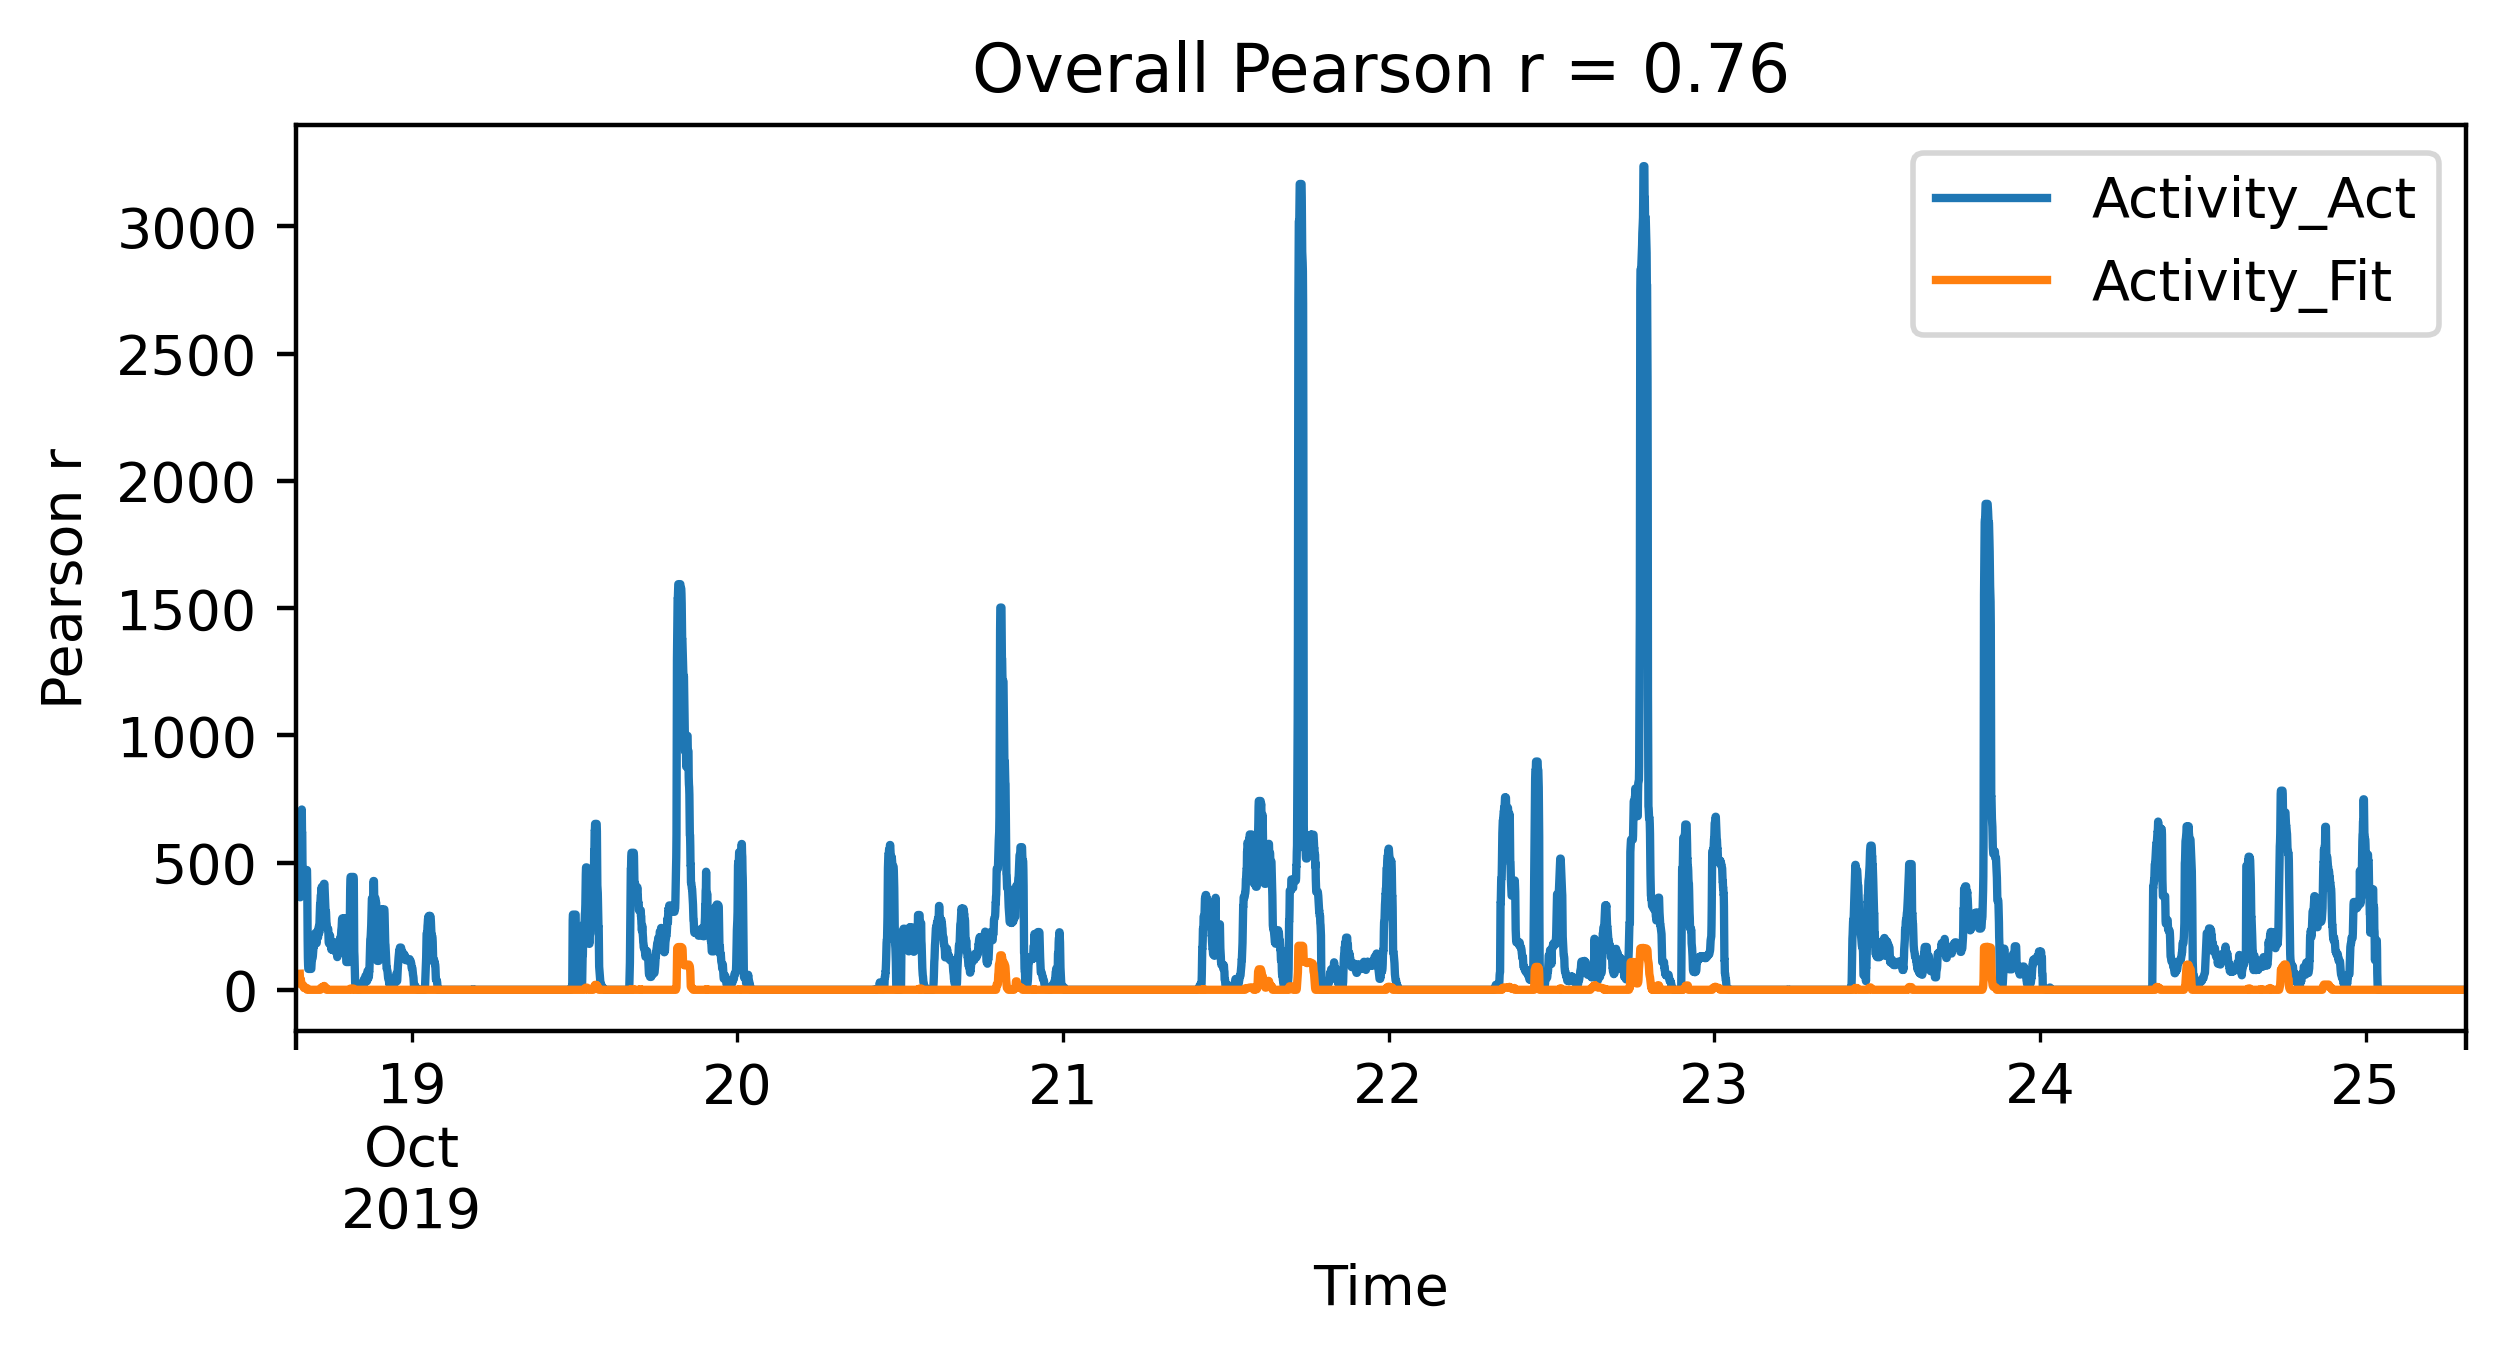

In [34]:
f,ax=plt.subplots(figsize=(7,3), dpi=400)
df.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

Text(0.5, 0.98, 'Activity data and rolling window correlation')

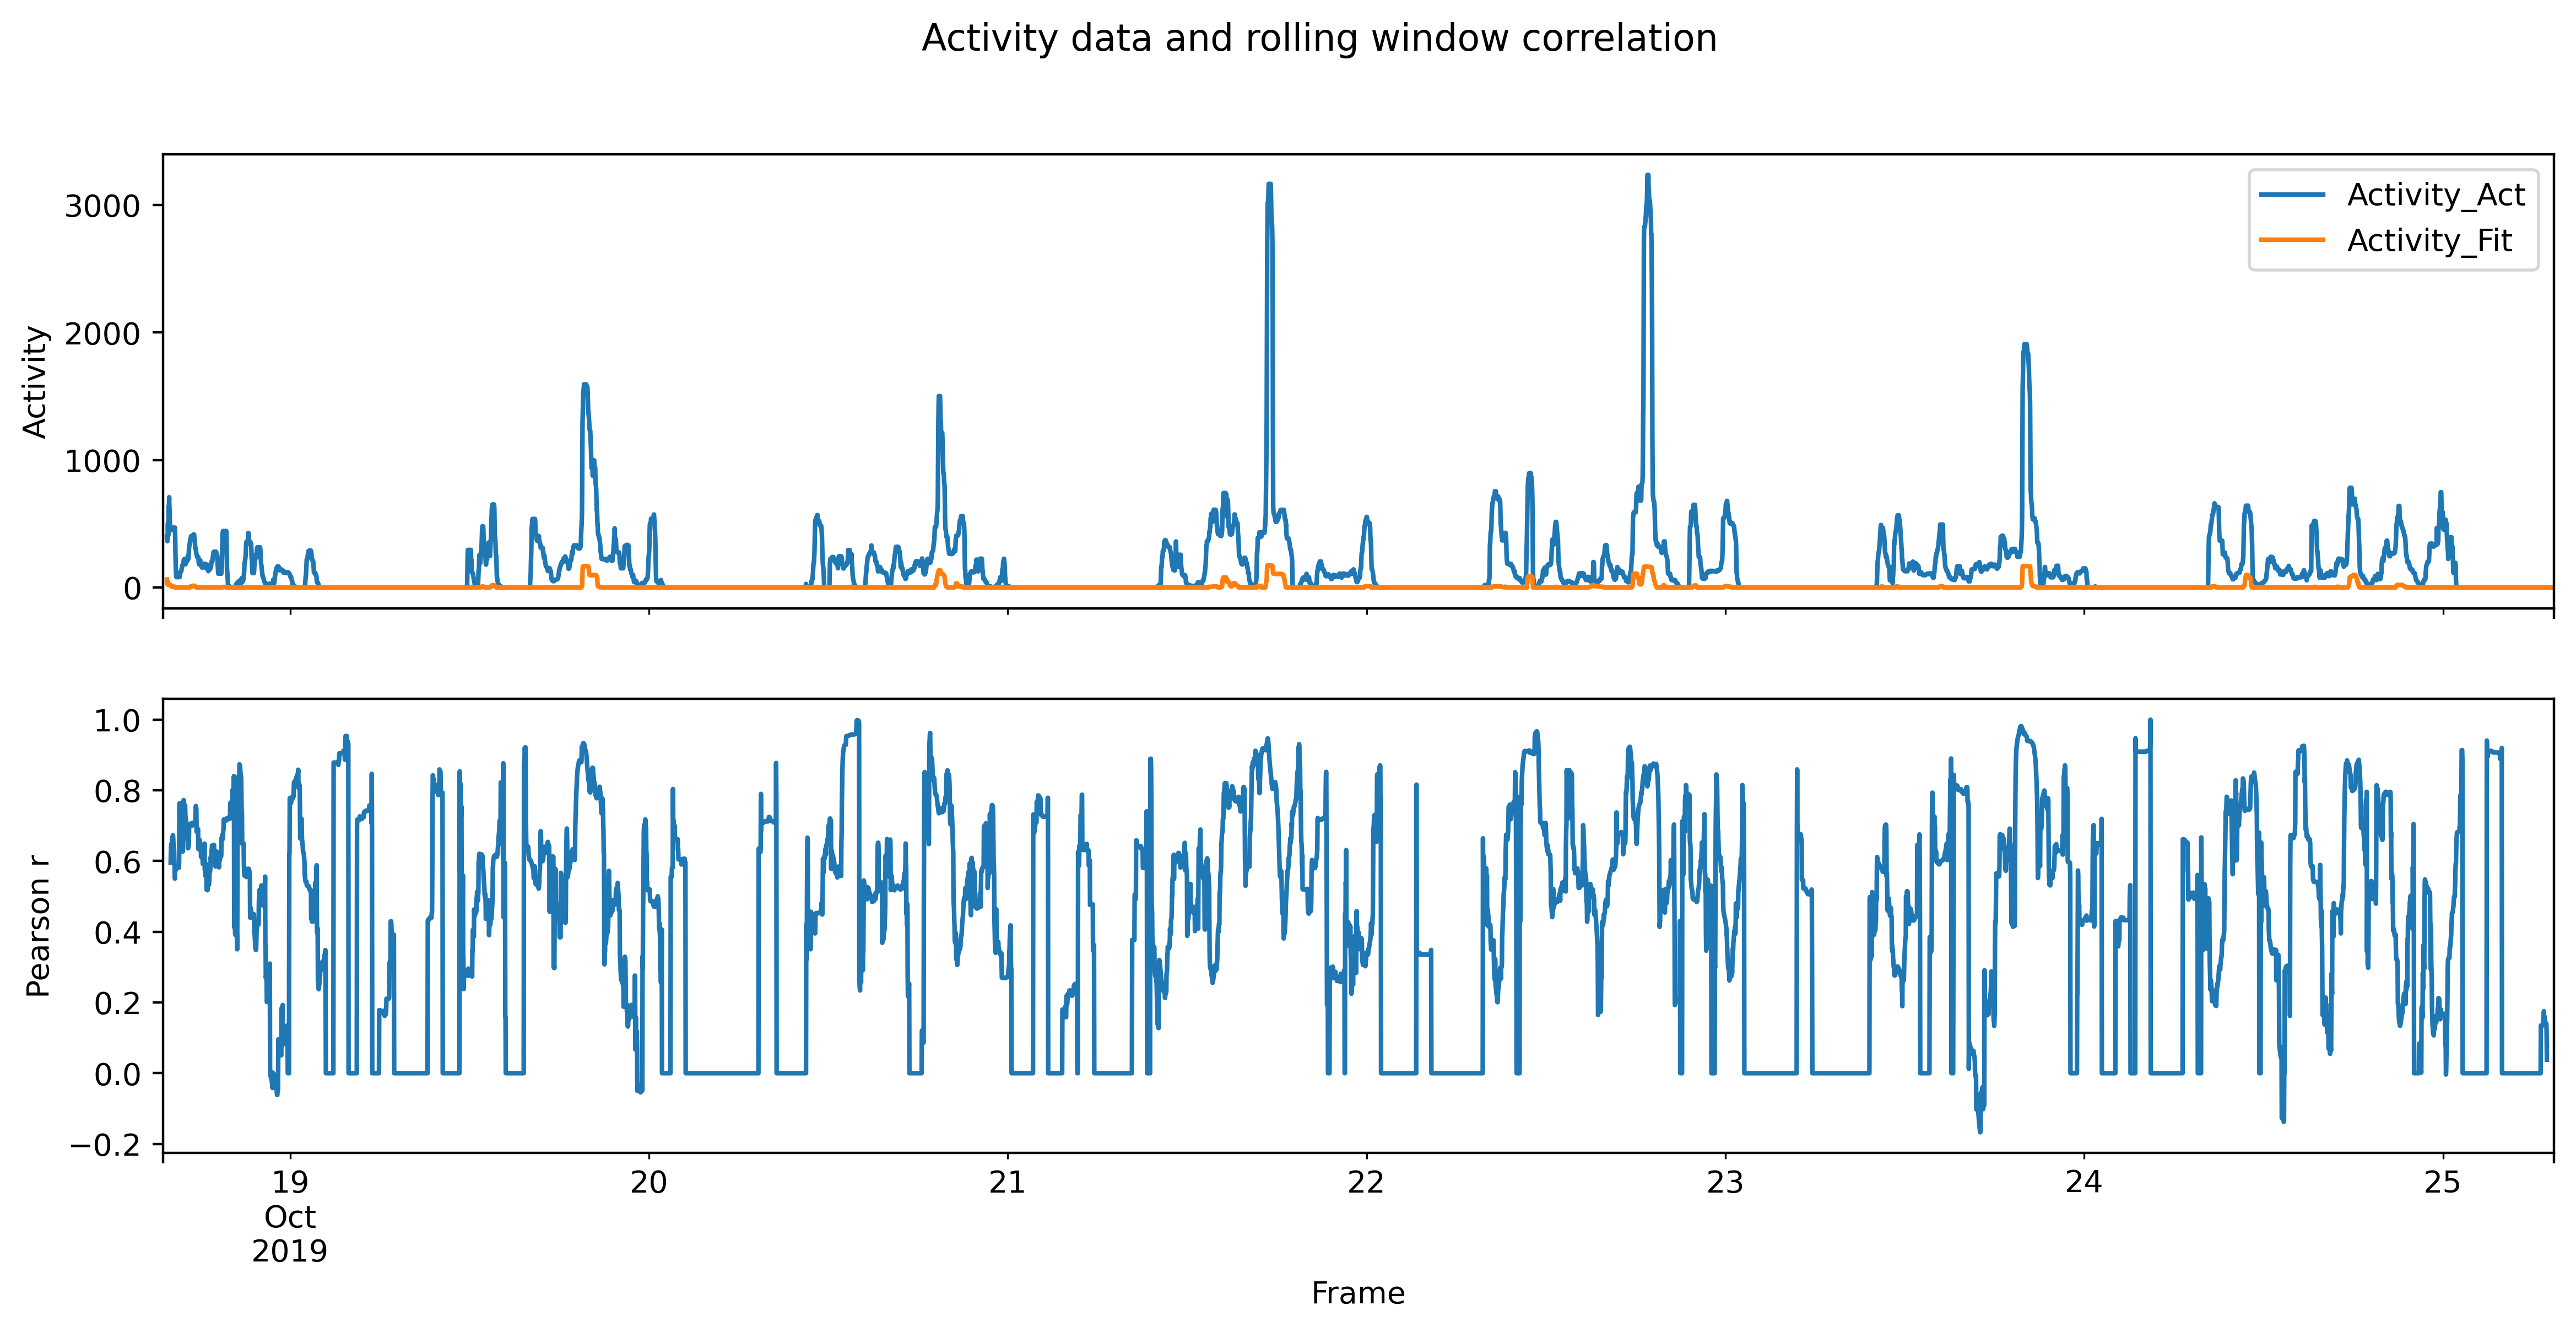

In [35]:
# Set window size to compute moving window synchrony.
r_window_size = 60
# Interpolate missing data.
df_interpolated = df.interpolate()
df_interpolated = df_interpolated
# Compute rolling window synchrony
rolling_r = df_interpolated['Activity_Act'].rolling(window=r_window_size, center=True).corr(df_interpolated['Activity_Fit'])
f,ax=plt.subplots(2,1,figsize=(14,6), dpi=400, sharex=True)
df.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Activity')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("Activity data and rolling window correlation")


In [36]:
rolling_r

Time
2019-10-18 15:30:00   NaN
2019-10-18 15:31:00   NaN
2019-10-18 15:32:00   NaN
2019-10-18 15:33:00   NaN
2019-10-18 15:34:00   NaN
                       ..
2019-10-25 07:22:00   NaN
2019-10-25 07:23:00   NaN
2019-10-25 07:24:00   NaN
2019-10-25 07:25:00   NaN
2019-10-25 07:26:00   NaN
Freq: T, Length: 9597, dtype: float64

Not great!

## At what times of day are correlation values low?

In [37]:
df_interpolated[df_interpolated.index.isin(rolling_r[rolling_r < 0.5].index)]

,Activity_Act,Activity_Fit
Time,,
2019-10-18 20:15:00,0.0,0
2019-10-18 20:16:00,261.0,4
2019-10-18 20:17:00,143.0,0
2019-10-18 20:18:00,0.0,0
2019-10-18 20:19:00,28.0,0
...,...,...
2019-10-25 06:53:00,0.0,0
2019-10-25 06:54:00,0.0,0
2019-10-25 06:55:00,0.0,0


/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Text(0, 0.5, 'Number of Minutes')

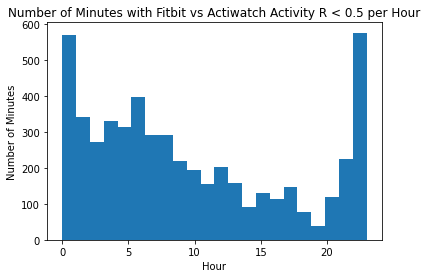

In [38]:
import datetime as dt

df_lowr = df_interpolated[df_interpolated.index.isin(rolling_r[rolling_r < 0.5].index)]
df_lowr['Time'] = pd.to_datetime(df_lowr.index)
df_lowr['times'] = df_lowr['Time'].dt.hour
#df_lowr.groupby(df_lowr['times']).sum()
fig, ax = plt.subplots()
ax.hist(df_lowr['times'], bins=22)
plt.title("Number of Minutes with Fitbit vs Actiwatch Activity R < 0.5 per Hour")
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Minutes')

Fitbit and Actiwatch have low correlation values around 23:00-01:00 for this participant.

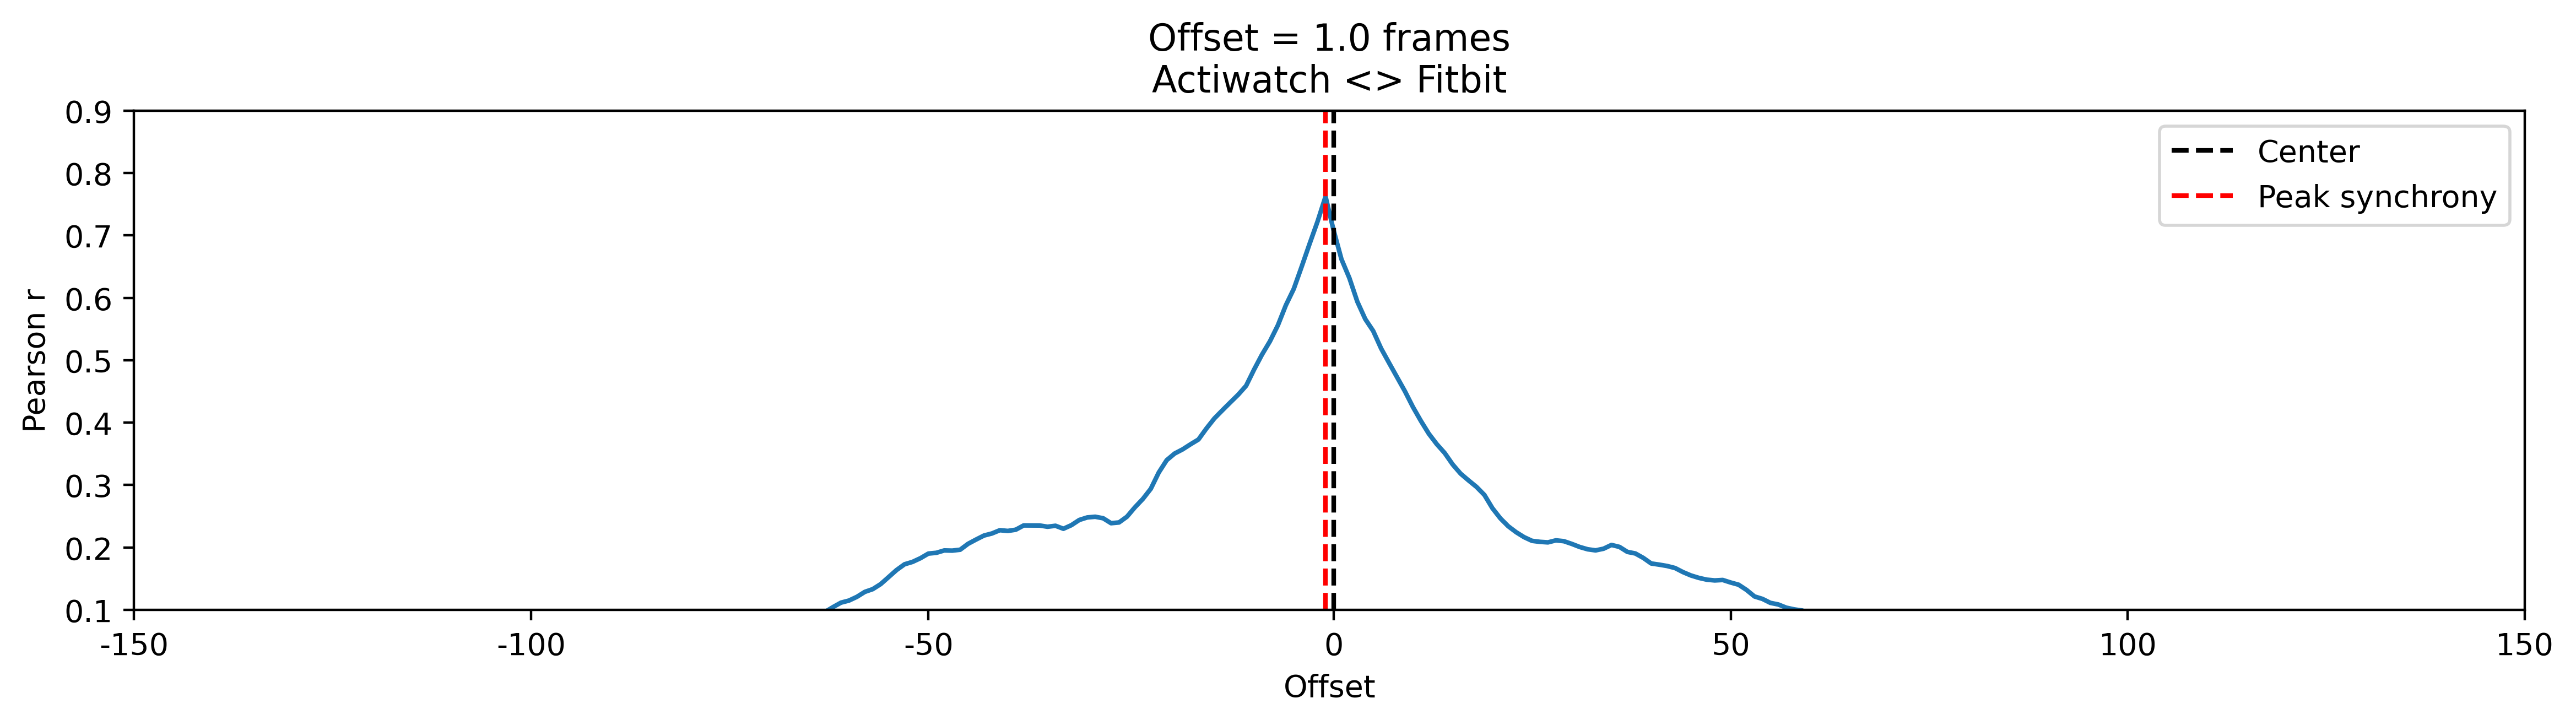

In [39]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = df['Activity_Act']
d2 = df['Activity_Fit']
minutes = 5
fpm = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(minutes*fpm),int(minutes*fpm+1))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)

f,ax=plt.subplots(figsize=(14,3), dpi=400)
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nActiwatch <> Fitbit',ylim=[.1,.9],xlim=[90,211], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

In the plot above, we can infer from the negative offset that Actiwatch is leading the interaction (correlation is maximized when Fitbit is pulled forward by 1 frames).

In [40]:
dfn = df.reset_index()
dfn

,Time,Activity_Act,Activity_Fit
0,2019-10-18 15:30:00,335.0,105
1,2019-10-18 15:31:00,478.0,90
2,2019-10-18 15:32:00,77.0,13
3,2019-10-18 15:33:00,109.0,0
4,2019-10-18 15:34:00,613.0,80
...,...,...,...
9592,2019-10-25 07:22:00,0.0,0
9593,2019-10-25 07:23:00,0.0,0
9594,2019-10-25 07:24:00,0.0,0
9595,2019-10-25 07:25:00,147.0,0


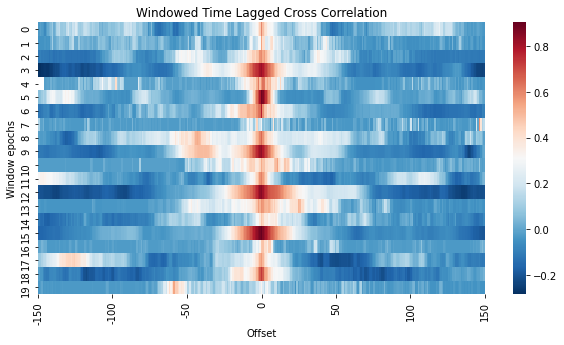

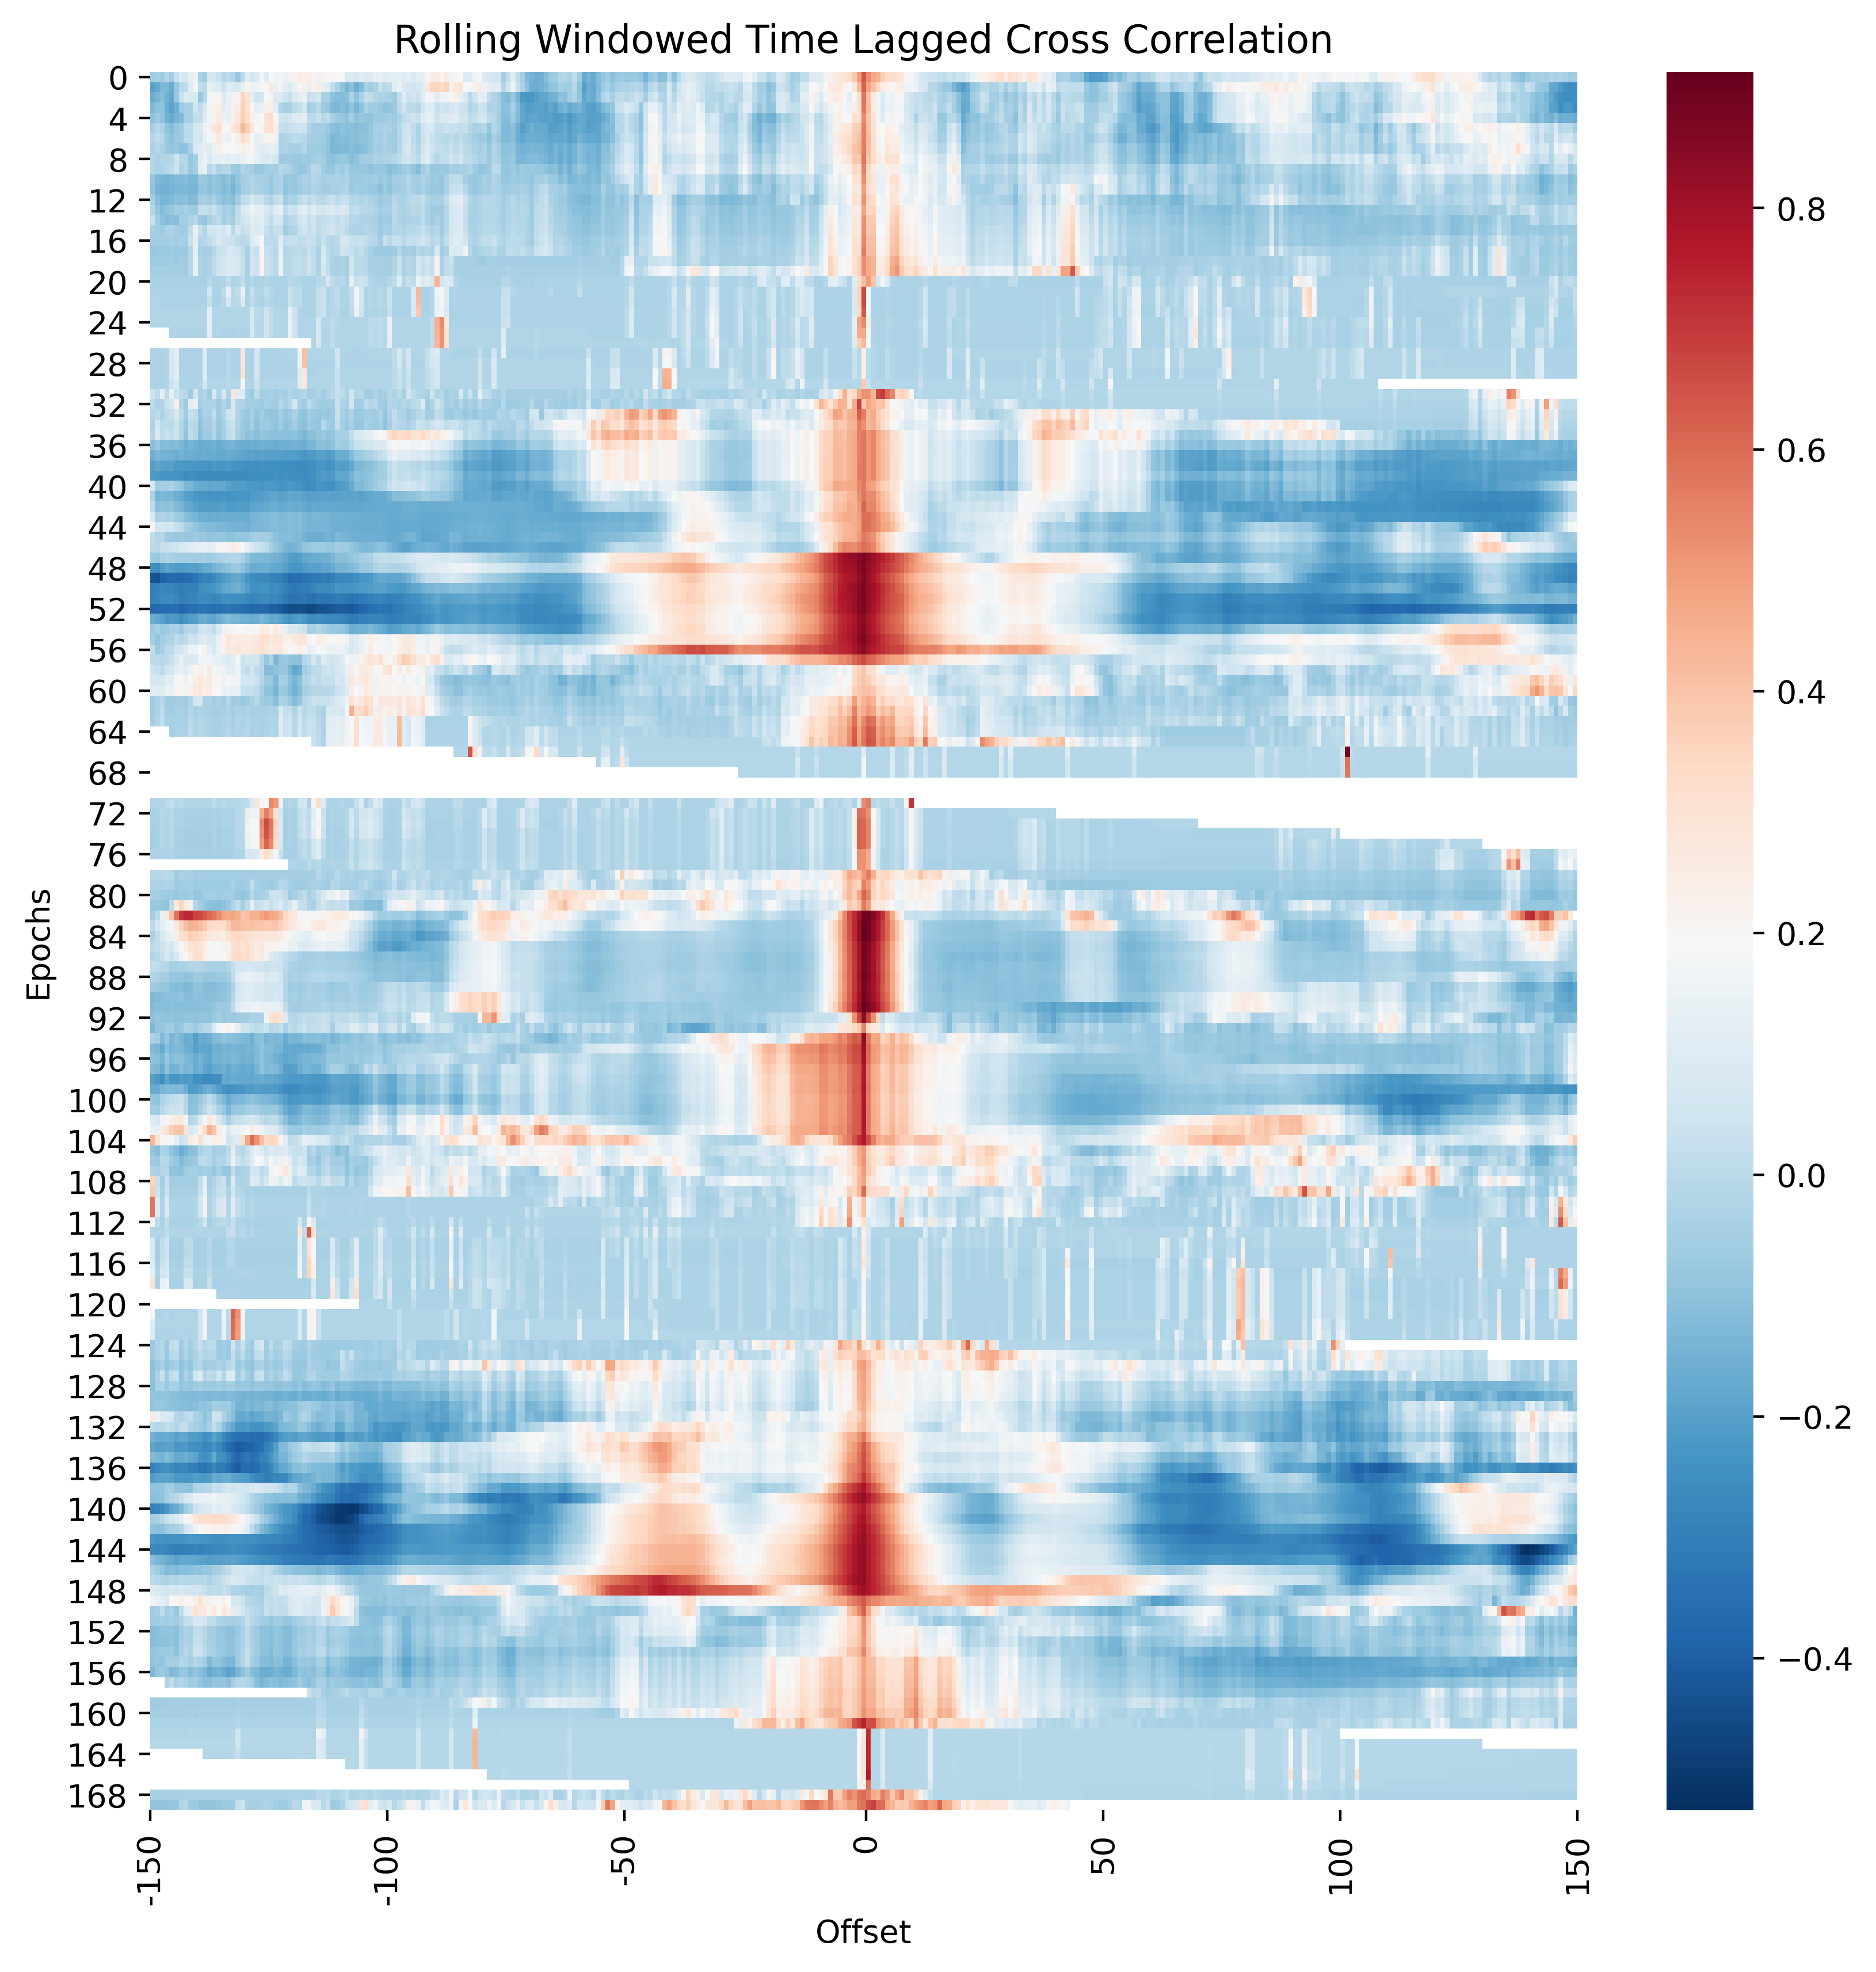

In [41]:
# Windowed time lagged cross correlation
minutes = 5
fpm = 30
no_splits = 20
samples_per_split = df.shape[0]/no_splits
rss=[]
dfn = df.reset_index()

for t in range(0, no_splits):
    d1 = dfn['Activity_Act'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2 = dfn['Activity_Fit'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(minutes*fpm),int(minutes*fpm+1))]
    rss.append(rs)
rss = pd.DataFrame(rss)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Window epochs')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

# Rolling window time lagged cross correlation
minutes = 5
fpm = 30
window_size = 300 #samples
t_start = 0
t_end = t_start + window_size
step_size = 30
rss=[]
while t_end < 5400:
    d1 = dfn['Activity_Act'].iloc[t_start:t_end]
    d2 = dfn['Activity_Fit'].iloc[t_start:t_end]
    rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(minutes*fpm),int(minutes*fpm+1))]
    rss.append(rs)
    t_start = t_start + step_size
    t_end = t_end + step_size
rss = pd.DataFrame(rss)

f,ax = plt.subplots(figsize=(10,10), dpi=400)
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Epochs')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

At offset close to 0, seeing high correlation across many of the epochs, with some epochs with lower correlation values regardless of offset, meaning there are periods with low correlation between the two devices' activity data.

Code to shift time series data: [Andres Araujo](https://stackoverflow.com/questions/33171413/cross-correlation-time-lag-correlation-with-pandas)

In [42]:
def df_shifted(df, target=None, lag=0):
    if not lag and not target:
        return df       
    new = {}
    for c in df.columns:
        if c == target:
            new[c] = df[target]
        else:
            new[c] = df[c].shift(periods=lag)
    return  pd.DataFrame(data=new)

In [43]:
print("Offset is %s frames" % offset)
if offset > 1:
    df_new = df_shifted(df, 'Activity_Act', lag = int(offset))

    overall_pearson_r_new = df_new.corr().iloc[0,1]
    print(f"Pandas computed Pearson r: {overall_pearson_r_new}")
    # out: Pandas computed Pearson r: 0.2058774513561943

    r_new, p_new = stats.pearsonr(df_new.dropna()['Activity_Act'], df_new.dropna()['Activity_Fit'])
    print(f"Scipy computed Pearson r: {r_new} and p-value: {p_new}")
    # out: Scipy comput
    
    f_new,ax_new=plt.subplots(figsize=(7,3))
    df_new.set_index('Time').rolling(window=30,center=True).median().plot(ax=ax)
    ax_new.set(xlabel='Time',ylabel='Pearson r')
    ax_new.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

Offset is 1.0 frames


In [57]:
indices

[0]

In [72]:
r_window_size = 30
rolling_r = []
actdays = []
fitdays = []

for f in act_files:
    subject = str.split(f, "act_files/preproc/")[1][0:5]
    indices = [ff for ff, s in enumerate(fitbit_files) if subject in s] # what if there are multiple matching files?
    print(subject)
    print(indices)
    
    rs = []
    offset = []

    if not indices:
        print("subject %s no fitbit data available" % subject)
    else:
        print("merging %s with %s" % (os.path.basename(f), os.path.basename(fitbit_files[indices[0]])))
        
        header_offset = []

        with open(f, encoding='utf-8') as file:
                    for header_offset, line in enumerate(file, 1):
                        if 'Line' in line:
                            header_offset = header_offset
                            break

        act = pd.read_csv(f, header=None, names = ['Time', 'Activity'])
        act['Time'] = pd.to_datetime(act['Time'])
        act = act.set_index(act['Time'])
        act = act.resample('1T').sum()
        actdays.append([subject, len(act)/60/24])
        
        fit = pd.read_csv(fitbit_files[indices[0]], header=None, names = ['Time', 'Activity'])
        fit['Time'] = pd.to_datetime(fit['Time'])
        fit = fit.set_index(fit['Time'])
        fit = fit.resample('1T').sum()
        fitdays.append([subject, len(act)/60/24])
        
        if not len(fit)/60/24 < 7:

            df = pd.merge(act, fit, how='inner', left_index=True, right_index=True, suffixes = ('_Act', '_Fit'))
            df = df[['Activity_Act', 'Activity_Fit']]

            rolling_r = df['Activity_Act'].rolling(window=r_window_size, center=True).corr(df['Activity_Fit'])
    #         rdf['Time'] = df.index
    #         rdf['R'] = rolling_r
            print(pd.DataFrame(rolling_r).mean())
            print(home_dir + "/Box/CogNeuroLab/Wearables/results/correlation/" + subject + "_window-" + str(r_window_size) + "_rolling_r.txt")
            pd.DataFrame(rolling_r).to_csv(home_dir + "/Box/CogNeuroLab/Wearables/results/correlation/" + subject + "_window-" + str(r_window_size) + "_rolling_r.txt", na_rep='NaN')
        
#         df.set_index('Time')

#         d1 = df[['Time','Activity_Act']]
#         d2 = df[['Time','Activity_Fit']]
        
#         d1.to_csv(home_dir + "/Box/CogNeuroLab/Wearables/data/circadian_measures/raw/actiwatch/" + subject + "_act.txt", sep = " ", header = False, index = False)
#         d2.to_csv(home_dir + "/Box/CogNeuroLab/Wearables/data/circadian_measures/raw/fitbit/" + subject + "_fit.txt", sep = " ", header = False, index = False) 
    

10011
[0]
merging 10011_7-d.csv with 10011.csv
0    0.3677
dtype: float64
/Users/mcmahonmc/Box/CogNeuroLab/Wearables/results/correlation/10011_window-30_rolling_r.txt
10012
[1]
merging 10012_7-d.csv with 10012.csv
10014
[2]
merging 10014_7-d.csv with 10014.csv
10016
[3]
merging 10016_7-d.csv with 10016.csv
0    0.372971
dtype: float64
/Users/mcmahonmc/Box/CogNeuroLab/Wearables/results/correlation/10016_window-30_rolling_r.txt
10023
[4]
merging 10023_7-d.csv with 10023.csv
0    0.070663
dtype: float64
/Users/mcmahonmc/Box/CogNeuroLab/Wearables/results/correlation/10023_window-30_rolling_r.txt
10024
[5]
merging 10024_7-d.csv with 10024.csv
0    0.535755
dtype: float64
/Users/mcmahonmc/Box/CogNeuroLab/Wearables/results/correlation/10024_window-30_rolling_r.txt
10025
[6]
merging 10025_7-d.csv with 10025.csv
0    0.486571
dtype: float64
/Users/mcmahonmc/Box/CogNeuroLab/Wearables/results/correlation/10025_window-30_rolling_r.txt
10033
[7]
merging 10033_7-d.csv with 10033.csv
0    0.549862
dt

In [75]:
fitdays

[['10011', 7.000694444444445],
 ['10012', 7.000694444444445],
 ['10014', 7.000694444444445],
 ['10016', 7.000694444444445],
 ['10023', 7.000694444444445],
 ['10024', 7.000694444444445],
 ['10025', 7.000694444444445],
 ['10033', 7.000694444444445],
 ['10035', 7.000694444444445],
 ['10038', 7.000694444444445],
 ['10040', 7.000694444444445],
 ['10045', 7.000694444444445],
 ['10049', 7.000694444444445],
 ['10062', 7.000694444444445],
 ['10076', 7.000694444444445],
 ['10139', 7.000694444444445],
 ['10140', 7.000694444444445],
 ['10143', 7.000694444444445],
 ['10144', 7.000694444444445],
 ['10145', 7.000694444444445],
 ['10146', 7.000694444444445],
 ['10147', 7.000694444444445],
 ['10148', 7.000694444444445],
 ['10149', 7.000694444444445],
 ['10150', 7.000694444444445],
 ['10152', 7.000694444444445],
 ['20103', 7.000694444444445],
 ['20105', 7.000694444444445],
 ['20108', 7.000694444444445],
 ['20113', 7.000694444444445],
 ['20115', 7.000694444444445],
 ['20120', 7.000694444444445],
 ['20122

In [78]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

cc = []
metrics = []
    
for f in act_files:
    subject = str.split(f, "act_files/preproc/")[1][0:5]
    indices = [ff for ff, s in enumerate(fitbit_files) if subject in s] #what if there are multiple matching files?
    print(subject)
    print(indices)
    
    rs = []
    offset = []

    if not indices:
        print("subject %s no fitbit data available" % subject)
    else:
        print("merging %s with %s" % (os.path.basename(f), os.path.basename(fitbit_files[indices[0]])))
        
        header_offset = []

        with open(f, encoding='utf-8') as file:
                    for header_offset, line in enumerate(file, 1):
                        if 'Line' in line:
                            header_offset = header_offset
                            break

        act = pd.read_csv(f, header=None, names = ['Time', 'Activity'])
        act['Time'] = pd.to_datetime(act['Time'])
        act = act.set_index(act['Time'])
        act = act.resample('1T').sum()
        
        fit = pd.read_csv(fitbit_files[indices[0]], header=None, names = ['Time', 'Activity'])
        fit['Time'] = pd.to_datetime(fit['Time'])
        fit = fit.set_index(fit['Time'])
        fit = fit.resample('1T').sum()
        
        if not len(fit)/60/24 < 7:

            df = pd.merge(act, fit, how='inner', left_index=True, right_index=True, suffixes = ('_Act', '_Fit'))
            df = df[['Activity_Act', 'Activity_Fit']]

            d1 = df['Activity_Act']
            d2 = df['Activity_Fit']
            minutes = 5
            fpm = 30
            rs = [crosscorr(d1,d2, lag) for lag in range(-int(minutes*fpm),int(minutes*fpm+1))]
            offset = np.ceil(len(rs)/2)-np.argmax(rs)

            cc.append([subject, max(rs), offset])

10011
[0]
merging 10011_7-d.csv with 10011.csv
10012
[1]
merging 10012_7-d.csv with 10012.csv
10014
[2]
merging 10014_7-d.csv with 10014.csv
10016
[3]
merging 10016_7-d.csv with 10016.csv
10023
[4]
merging 10023_7-d.csv with 10023.csv
10024
[5]
merging 10024_7-d.csv with 10024.csv
10025
[6]
merging 10025_7-d.csv with 10025.csv
10033
[7]
merging 10033_7-d.csv with 10033.csv
10035
[8]
merging 10035_7-d.csv with 10035.csv
10038
[9]
merging 10038_7-d.csv with 10038.csv
10040
[10]
merging 10040_7-d.csv with 10040.csv
10045
[11]
merging 10045_7-d.csv with 10045.csv
10049
[12]
merging 10049_7-d.csv with 10049.csv
10062
[13]
merging 10062_7-d.csv with 10062.csv
10076
[14]
merging 10076_7-d.csv with 10076.csv
10139
[15]
merging 10139_7-d.csv with 10139.csv
10140
[16]
merging 10140_7-d.csv with 10140.csv
10143
[17]
merging 10143_7-d.csv with 10143.csv
10144
[18]
merging 10144_7-d.csv with 10144.csv
10145
[19]
merging 10145_7-d.csv with 10145.csv
10146
[20]
merging 10146_7-d.csv with 10146.csv
10

In [79]:
cc_df = pd.DataFrame(cc, columns = ['subject', 'cross_cor', 'offset'])
cc_df.to_csv(home_dir + "/Box/CogNeuroLab/Wearables/results/correlation/crosscor.csv")
cc_df[0:5]

,subject,cross_cor,offset
0,10011,0.562682,1.0
1,10016,0.745201,1.0
2,10023,0.252984,1.0
3,10024,0.551617,1.0
4,10025,0.611327,1.0


In [111]:
print('mean cross correlation r=%.2f±%.2f, n=%.f' % (cc_df['cross_cor'].mean(), cc_df['cross_cor'].std(), len(cc_df)))


mean cross correlation r=0.57±0.14, n=44


In [92]:
from scipy.stats import ttest_ind

ya = cc_df[cc_df['subject'].str.startswith('1')]
oa = cc_df[cc_df['subject'].str.startswith('2')]

ttest_ind(ya['cross_cor'], oa['cross_cor'], nan_policy = 'omit')


Ttest_indResult(statistic=-0.6562493723964519, pvalue=0.5154212985687776)

In [93]:
ttest_ind(ya['cross_cor'], oa['cross_cor'], nan_policy = 'omit', equal_var=False)

Ttest_indResult(statistic=-0.6490704995849168, pvalue=0.5203813250651891)

In [109]:
print('YA mean cross correlation r: %.2f±%.2f, n=%.f' % (ya['cross_cor'].mean(), ya['cross_cor'].std(), len(ya)))
print('OA mean cross correlation r: %.2f±%.2f, n=%.f' % (oa['cross_cor'].mean(), oa['cross_cor'].std(), len(oa)))


YA mean cross correlation r: 0.56±0.16, n=21
OA mean cross correlation r: 0.59±0.12, n=23


Text(0, 0.5, '')

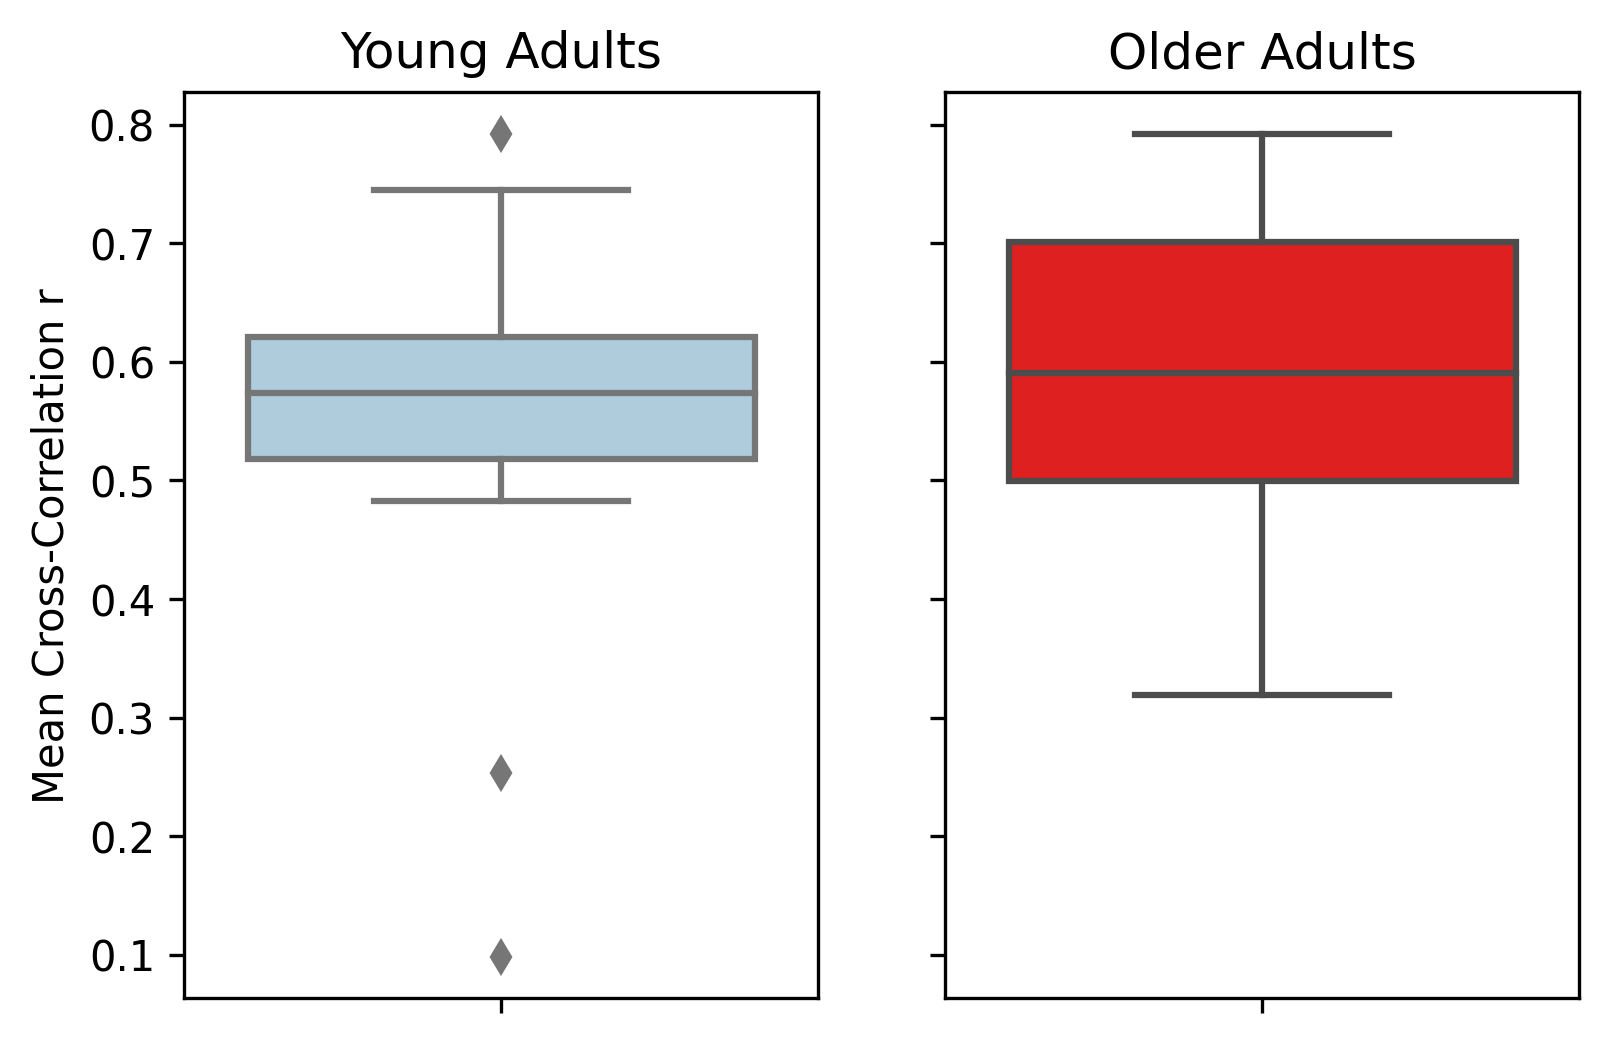

In [107]:
sns.set_palette(sns.color_palette('Paired'))
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=300, sharey=True)
sns.boxplot(y = ya['cross_cor'], ax = axes[0])
sns.boxplot(y = oa['cross_cor'], ax = axes[1], color = 'r')
axes[0].set_title('Young Adults')
axes[1].set_title('Older Adults')
axes[0].set_ylabel('Mean Cross-Correlation r')
axes[1].set_ylabel('')